In [1]:
import numpy as np
import pandas as pd
from mlp import MultiLayerNeuralNetwork

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv('./datasets/digit_pixels.csv')

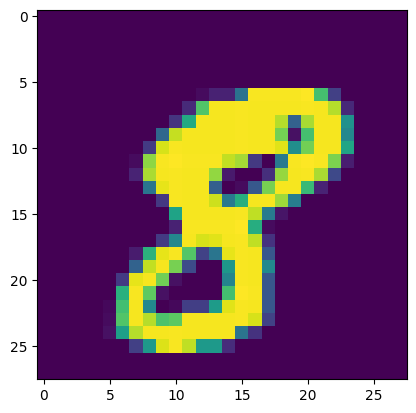

label -->8


In [3]:
import plotly.express as px
from matplotlib import pyplot as plt
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
img = X[10].reshape(28,28)
plt.imshow(img)
plt.show()
print('label -->'+str(Y[10]))
Y=np.array(pd.get_dummies(Y))


In [4]:
X.shape

(42000, 784)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [6]:
Y_train.shape

(33600, 10)

In [7]:
X_train.shape

(33600, 784)


                                       ( MODEL SUMMARY )                                

               Layer        Activation Function        Nodes               Params       

               Input               linear               784                  0          
        ----------------------------------------------------------------------------------

               Dense                tanh                 10                 7850        
        ----------------------------------------------------------------------------------

               Output             softmax                10                 110         
        ----------------------------------------------------------------------------------


        Total Params (trainable) - 7960
        __________________________________________________________________________________
        
Loss: 1.73473076 =================> at epoch 1, elapse-time : 10.41771600 seconds
Loss: 1.05348738 =================> at epoch 2, elaps

0.8509523809523809

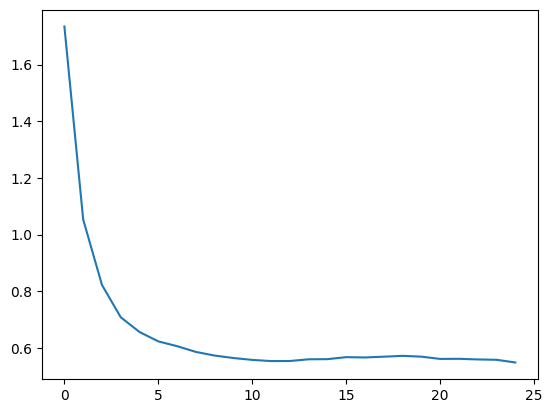

In [8]:
model = MultiLayerNeuralNetwork()
model.add_layer(784,input_layer=True)
model.add_layer(10,activation_function='tanh')
model.add_layer(10,activation_function='softmax',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='categorical_cross_entropy',weight_initializer='glorot_uniform',seed=3)
losses=model.fit(X_train, Y_train,learning_rate=0.0001,epochs=25,show_loss=True,early_stopping=False)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
263/263 [==============================] - 0s 1ms/step


0.8563095238095239

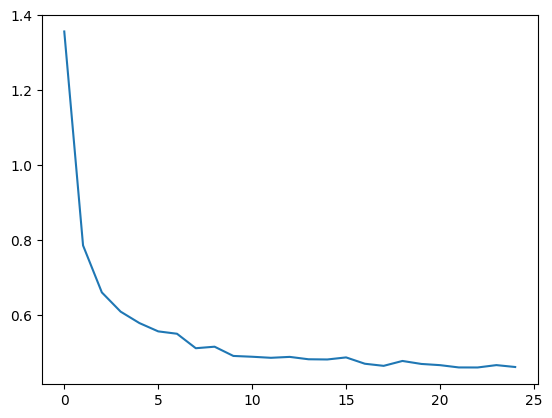

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
initializer = keras.initializers.GlorotUniform(seed=3)
model.add(Dense(10, activation='tanh', input_dim=784,kernel_initializer=initializer))
model.add(Dense(10, activation='softmax',kernel_initializer=initializer))
model.compile(loss='CategoricalCrossentropy', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=25,verbose=0)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)